In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(img):
    cv2.imshow('img',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

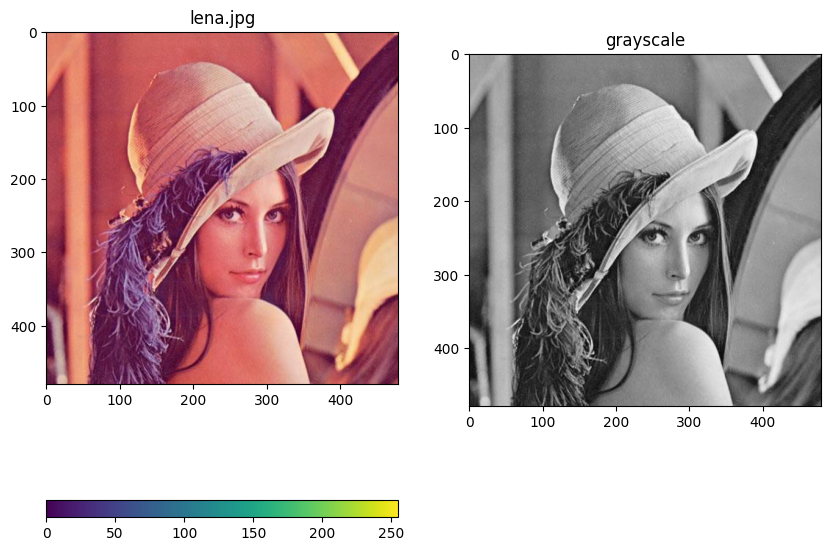

In [2]:
img=cv2.imread('./sample_images/lena.jpg')
grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=img[:,:,::-1] # convert to rgb


fig=plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("lena.jpg")
plt.colorbar(orientation='horizontal')


fig.add_subplot(1,2,2)
plt.imshow(grayscale,cmap='gray')
plt.title("grayscale")
plt.show()



## Histogram

156


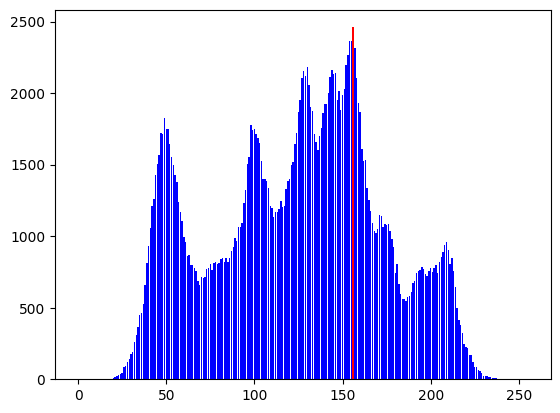

In [3]:
hist_array=np.bincount(grayscale.ravel(),minlength=256)
color_bar=['blue']*256
max_bar=np.argmax(hist_array)
color_bar[max_bar]="red"
print(max_bar)
plt.bar(range(256),hist_array,color=color_bar)
plt.show()

we can make a split at the max_value of histogram to be the threshold value.

## Histogram Equalization

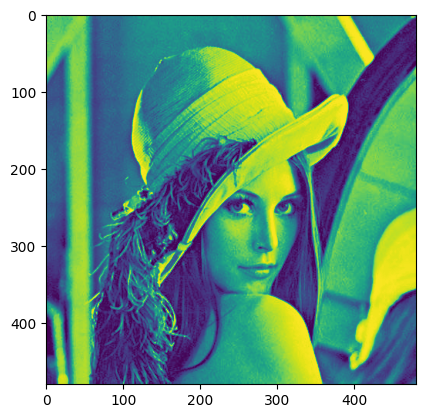

230400
189


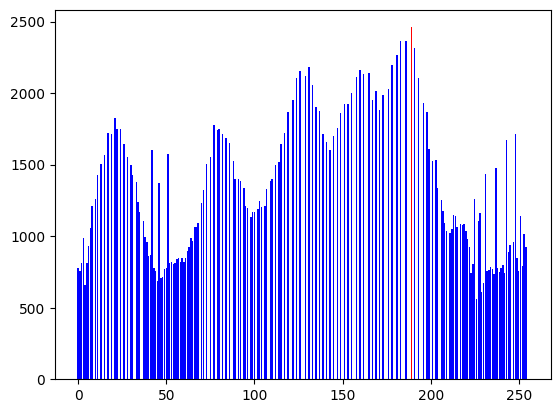

In [4]:
normalized_hist_array=hist_array/hist_array.sum()
cum_sum=np.cumsum(normalized_hist_array)
transformation_array=np.uint8(cum_sum*255)

eq_hist_array=np.uint8([transformation_array[i] for i in grayscale.ravel()])
eq_hist_image=np.reshape(eq_hist_array,grayscale.shape)
plt.imshow(eq_hist_image)
plt.show()

hist_eq_array=np.bincount(eq_hist_image.ravel(),minlength=256)
max_bar_he=np.argmax(hist_eq_array)

print(len(eq_hist_array))
bar_color=['blue']*256
bar_color[max_bar_he]='red'
print(max_bar_he)
plt.bar(range(256),hist_eq_array,color=bar_color)
plt.show()

### Histogram Stretching
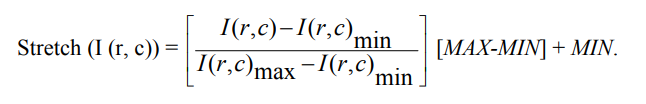

I(r,c)min -> minimum value of grayscale intensity                                                                               
I(r,c)max -> minimum value of grayscale intensity                                                                               
MAX -> maximum allowed intensity based on datatype uint8 -> 255                                                                 
MIN -> minimum allowed intensity based on datatype uint8 -> 0                                                                                                                                  

In [5]:
img1=((grayscale-np.min(grayscale))/(np.max(grayscale)-np.min(grayscale)))*255
img1=np.uint8(img1)
img1.shape

(480, 480)

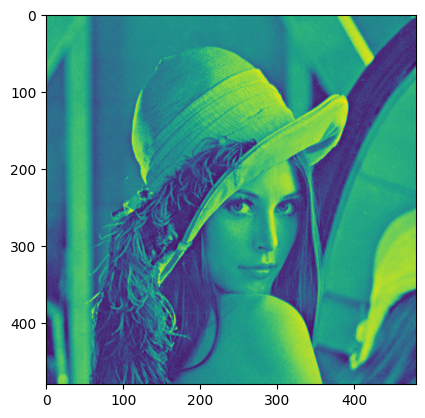

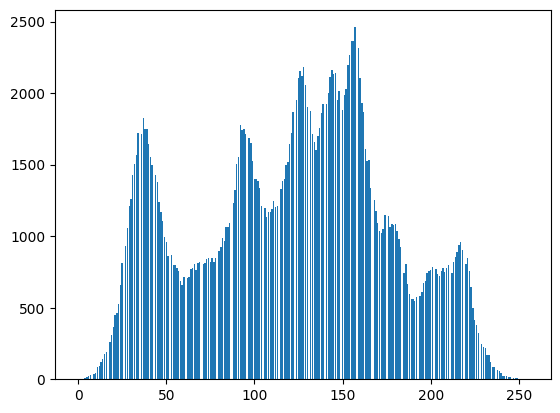

In [6]:
plt.imshow(img1)
plt.show()

img1_hist_array=np.bincount(img1.ravel(),minlength=256)
plt.bar(range(256),img1_hist_array)
plt.show()

### Histogram Clipping
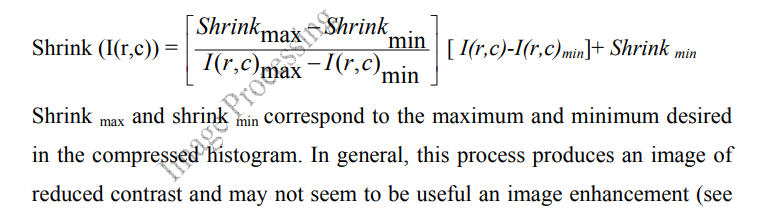

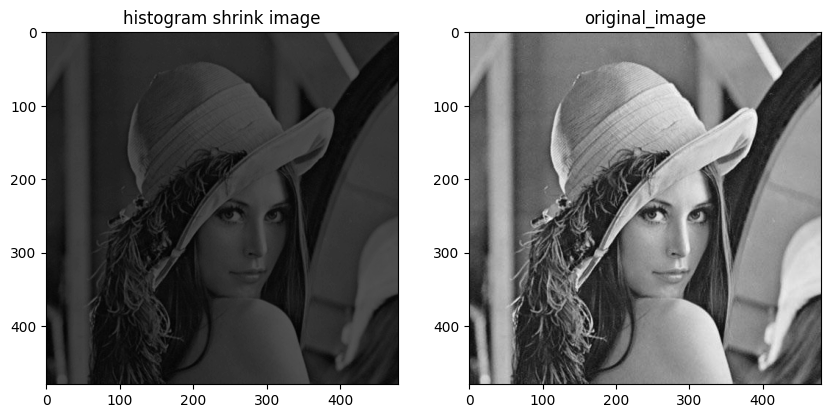

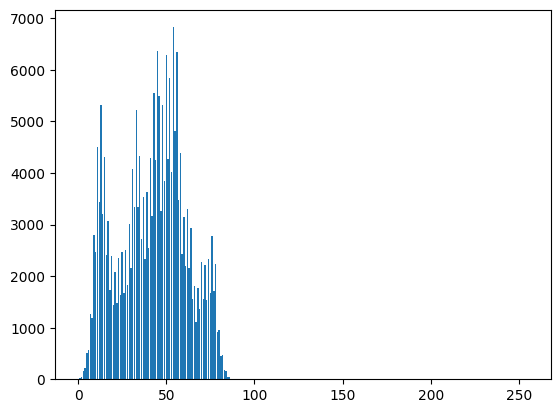

In [19]:
shrink_max=90
shrink_min=0
img_shrink=(((shrink_max-shrink_min)/(np.max(grayscale)-np.min(grayscale)))*(grayscale-np.min(grayscale)))+shrink_min
img_shrink=np.uint8(img_shrink)

fig=plt.figure(figsize=(10,10))

fig.add_subplot(1,2,1)
plt.title("histogram shrink image")
plt.imshow(img_shrink,cmap='gray',vmin=0,vmax=255)
# plt.show()


fig.add_subplot(1,2,2)
plt.title("original_image")
plt.imshow(grayscale,cmap='gray')
plt.show()

img1_hist_array=np.bincount(img_shrink.ravel(),minlength=256)
plt.bar(range(256),img1_hist_array)
plt.show()

### Histogram Sliding

we will use the histogram shrunk image to perform histogram sliding.

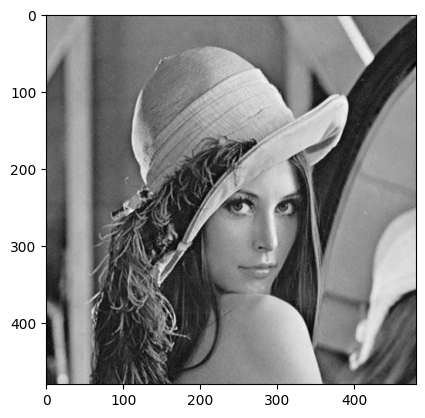

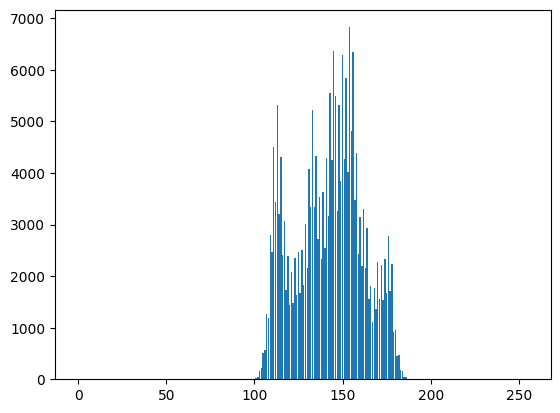

In [25]:
slide_histogram=img_shrink+100
plt.imshow(slide_histogram,cmap='gray')
plt.show()
silde_histogram_array=np.bincount(slide_histogram.ravel(),minlength=256)
plt.bar(range(256),silde_histogram_array)
plt.show()